In [5]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [8]:
def align(img, goal, pyramid=True, estimate_i=0, estimate_j=0, meta=None, verbose=False):
    """
    Returns img such that it is aligned according to goal
    """
    if img.shape[0] > 100 and pyramid: # if the image is too big, we need to downsample it. also assume nearly square.
        img_downsampled = sk.transform.rescale(img, 0.5)
        goal_downsampled = sk.transform.rescale(goal, 0.5)
        _, estimate_i, estimate_j = align(img_downsampled, goal_downsampled, pyramid=pyramid)
        estimate_i *= 2
        estimate_j *= 2

    best_img, best_i, best_j = None, None, None
    best_metric = float("inf")
    search_range = 3
    stride = 1
    rg = trange if img.shape[0] > 1000 and verbose else range
    for i in rg(-search_range*stride + estimate_i, search_range*stride + estimate_i + 1, stride):
        for j in range(-search_range*stride + estimate_j, search_range*stride + estimate_j + 1, stride):
            shifted_img = np.roll(img, shift=(i, j), axis=(0, 1))
            cropped_shifted_img = shifted_img[int(0.1*shifted_img.shape[0]):int(0.9*shifted_img.shape[0]), int(0.1*shifted_img.shape[1]):int(0.9*shifted_img.shape[1])]
            cropped_goal = goal[int(0.1*goal.shape[0]):int(0.9*goal.shape[0]), int(0.1*goal.shape[1]):int(0.9*goal.shape[1])]
            metric = np.sqrt(np.sum(np.sum((cropped_shifted_img - cropped_goal)**2)))
            if meta is not None:
                meta['norms'].append(metric)
            cropped_shifted_img_flat, cropped_goal_flat = cropped_shifted_img.flatten(), cropped_goal.flatten()
            metric2 = np.dot(cropped_shifted_img_flat/np.linalg.norm(cropped_shifted_img_flat), cropped_goal_flat/np.linalg.norm(cropped_goal_flat))
            if meta is not None:
                meta['nccs'].append(metric2)
            metric = metric/metric2**2
            if metric < best_metric:
                best_metric = metric
                best_img = shifted_img
                best_i, best_j = i, j
    #print(f"best_i: {best_i}, best_j: {best_j}, img_shape: {img.shape}")
    return best_img, best_i, best_j

In [10]:
from pathlib import Path
data_dir = Path("data")
results_dir = Path("results")
results_dir.mkdir(exist_ok=True)

# Get sorted list of files
filepaths = sorted(data_dir.iterdir())

for filepath in filepaths:  # all files in data/ in alphabetical order
    im = skio.imread(filepath)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
        
    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(int)

    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    #print(b.shape)
    # align the images
    # functions that might be useful for aligning the images include:
    # np.roll, np.sum, sk.transform.rescale (for multiscale)

    ag, gx, gy = align(g, b)
    ar, rx, ry = align(r, b)
    # create a color image
    im_out = np.dstack([ar, ag, b])

    print(filepath.stem)
    print(f"Green shift: {gx}, {gy}")
    print(f"Red shift: {rx}, {ry}")
    # save the image
    fname = results_dir / (filepath.stem + ".jpg")
    skio.imsave(fname, (np.clip(im_out, 0, 1) * 255).astype(np.uint8))

    # display the image
    #skio.imshow(im_out)
    ##skio.show()

cathedral
Green shift: 5, 2
Red shift: 12, 3
church
Green shift: 25, 4
Red shift: 58, -4
emir
Green shift: 49, 24
Red shift: 103, 57
harvesters
Green shift: 60, 17
Red shift: 124, 13
icon
Green shift: 41, 17
Red shift: 89, 23
italil
Green shift: 38, 21
Red shift: 76, 35
lastochikino
Green shift: -3, -2
Red shift: 75, -9
lugano
Green shift: 41, -16
Red shift: 93, -29
melons
Green shift: 82, 11
Red shift: 178, 13
monastery
Green shift: -3, 2
Red shift: 3, 2
self_portrait
Green shift: 79, 29
Red shift: 176, 37
siren
Green shift: 49, -6
Red shift: 96, -25
three_generations
Green shift: 53, 14
Red shift: 112, 11
tobolsk
Green shift: 3, 3
Red shift: 6, 3


In [ ]:
from pathlib import Path
data_dir = Path("additional_data")
results_dir = Path("additional_results")
results_dir.mkdir(exist_ok=True)

for filepath in data_dir.iterdir():  # all files in data/
    im = skio.imread(filepath)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
        
    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(int)

    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    #print(b.shape)
    # align the images
    # functions that might be useful for aligning the images include:
    # np.roll, np.sum, sk.transform.rescale (for multiscale)

    ag, gx, gy = align(g, b)
    ar, rx, ry = align(r, b)
    # create a color image
    im_out = np.dstack([ar, ag, b])

    print(filepath.stem)
    print(f"Green shift: {gx}, {gy}")
    print(f"Red shift: {rx}, {ry}")
    # save the image
    fname = results_dir / (filepath.stem + ".jpg")
    skio.imsave(fname, (np.clip(im_out, 0, 1) * 255).astype(np.uint8))

    # display the image
    #skio.imshow(im_out)
    ##skio.show()

(3209, 3703)
camelman
Green shift: 20, 15
Red shift: 80, 38
(3250, 3788)
figurine
Green shift: 21, 27
Red shift: 108, 53
(3244, 3761)
cliff
Green shift: 39, -1
Red shift: 151, -7


(3209, 3702)
best_i: 1, best_j: 1, img_shape: (100, 116)
best_i: 3, best_j: 2, img_shape: (200, 232)
best_i: 6, best_j: 3, img_shape: (401, 463)
best_i: 12, best_j: 6, img_shape: (802, 926)


100%|██████████| 7/7 [00:01<00:00,  5.22it/s]


best_i: 25, best_j: 12, img_shape: (1604, 1851)


100%|██████████| 7/7 [00:07<00:00,  1.06s/it]


best_i: 49, best_j: 24, img_shape: (3209, 3702)
best_i: 3, best_j: 2, img_shape: (100, 116)
best_i: 6, best_j: 4, img_shape: (200, 232)
best_i: 13, best_j: 7, img_shape: (401, 463)
best_i: 26, best_j: 14, img_shape: (802, 926)


100%|██████████| 7/7 [00:01<00:00,  5.20it/s]


best_i: 52, best_j: 28, img_shape: (1604, 1851)


100%|██████████| 7/7 [00:07<00:00,  1.07s/it]


best_i: 103, best_j: 57, img_shape: (3209, 3702)


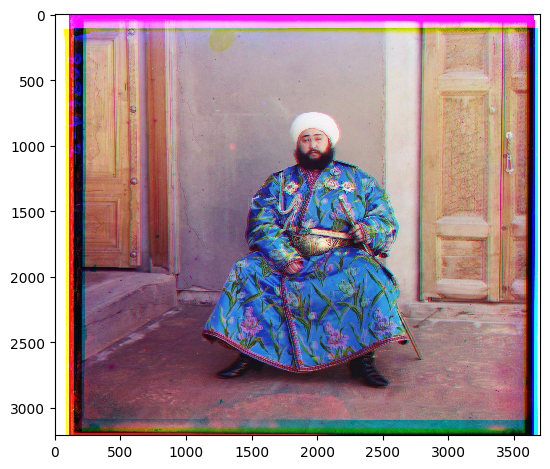

In [61]:
# name of the input file
imname = 'data/emir.tif'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)
    
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]
print(b.shape)
# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

ag = align(g, b)[0]
meta = {"norms": [], "nccs": []}
ar = align(r, b, meta=meta)[0]
# create a color image
im_out = np.dstack([ar, ag, b])

# save the image
fname = 'results/out_fname.jpg'
skio.imsave(fname, (np.clip(im_out, 0, 1) * 255).astype(np.uint8))

# display the image
skio.imshow(im_out)
skio.show()

In [63]:
len(meta['norms'])

49

In [51]:
# save the image
fname = 'results/out_fname.jpg'
skio.imsave(fname, (np.clip(im_out, 0, 1) * 255).astype(np.uint8))

In [49]:
im_out

array([[[0.95205615, 0.95156786, 0.9556878 ],
        [0.94808881, 0.95086595, 0.94937057],
        [0.94900435, 0.95248341, 0.94567788],
        ...,
        [0.94787518, 0.9562829 , 0.02352941],
        [0.9507744 , 0.95440604, 0.02352941],
        [0.94937057, 0.95251392, 0.02352941]],

       [[0.94915694, 0.9519646 , 0.94531167],
        [0.9528191 , 0.95500114, 0.9523003 ],
        [0.95504692, 0.95555047, 0.95683223],
        ...,
        [0.94622721, 0.94915694, 0.02352941],
        [0.95031662, 0.95275807, 0.02352941],
        [0.95217823, 0.95205615, 0.02352941]],

       [[0.9494316 , 0.95431449, 0.95080491],
        [0.95056077, 0.95532158, 0.94598306],
        [0.95294118, 0.95269703, 0.94494545],
        ...,
        [0.95089647, 0.95582513, 0.02352941],
        [0.95089647, 0.95150683, 0.02352941],
        [0.94961471, 0.95275807, 0.02352941]],

       ...,

       [[0.94802777, 0.95559625, 0.94290074],
        [0.95930419, 0.95381094, 0.94433509],
        [0.95144579, 0

In [74]:
b.shape

(341, 391)

In [22]:
color = ['g' if i < len(norms)/2 else 'r' for i in range(len(norms))]

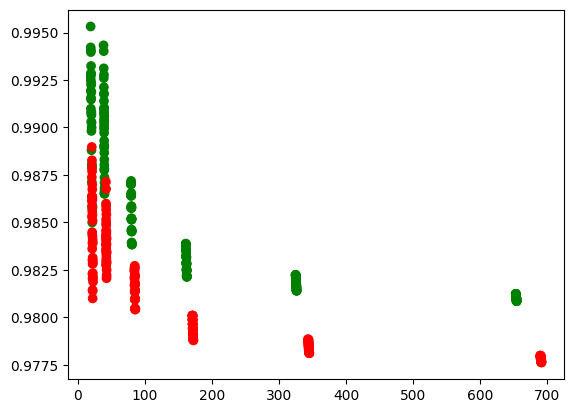

In [23]:
plt.scatter(norms, nccs, color=color)
plt.show()
# looks like the two curves are r and g, and they're monotonically related.

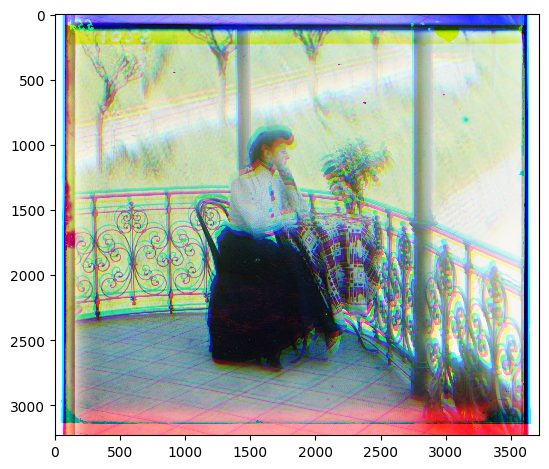

In [30]:
im_out = np.dstack([r, g, b])

# save the image
fname = 'results/out_fname.jpg'
#skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()

In [19]:
b_flat, g_flat = b.flatten(), g.flatten()
np.dot(b_flat/np.linalg.norm(b_flat), g_flat/np.linalg.norm(g_flat))

0.9465291629419613

In [34]:
b_flat, ag_flat = b.flatten(), ag.flatten()
np.dot(b_flat/np.linalg.norm(b_flat), ag_flat/np.linalg.norm(ag_flat))

0.9477895420600555

In [30]:
np.sqrt(np.sum(np.sum((b - g)**2)))

70.44953410105525

In [33]:
np.sqrt(np.sum(np.sum((b - ag)**2)))

69.67737615183887

In [56]:
b

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.99607843, 0.98823529,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99215686],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.98823529]])